In [1]:
# import packages

import pandas as pd
import numpy as np
import os
# plots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud ,STOPWORDS

import warnings
warnings.filterwarnings("ignore")

#encode
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# model
from sklearn.cluster import KMeans, HDBSCAN, AgglomerativeClustering, MiniBatchKMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

# pca
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.neighbors import NearestNeighbors
from collections import Counter
# metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from tqdm import tqdm


# Data Collection & Exploration

In [3]:
# reading data
data = pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [157]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [159]:
data.shape

(7787, 12)

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [163]:
data.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [165]:
# chicking missing values
print("-"*20)
print("   Missing values")
print("-"*20)
data.isnull().sum()

--------------------
   Missing values
--------------------


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [167]:
# checking duplicated values

data.duplicated().sum()

0

In [169]:
# Check Unique Values for each cols.
print("unique values count")
print("-"*20)
for column in data.columns:
    print(f"{column}: {data[column].nunique()}")

unique values count
--------------------
show_id: 7787
type: 2
title: 7787
director: 4049
cast: 6831
country: 681
date_added: 1565
release_year: 73
rating: 14
duration: 216
listed_in: 492
description: 7769


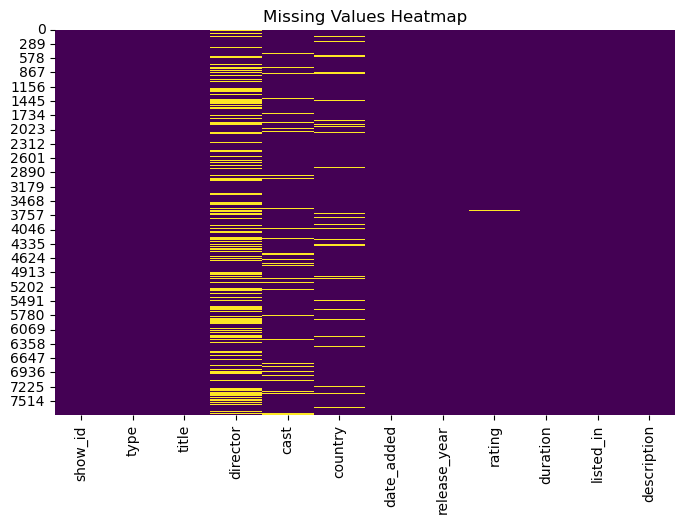

In [8]:
# Visualizing the missing values

plt.figure(figsize=(8, 5))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## Handling null

In [10]:
# filling rating cols null values

data["rating"].isnull().sum()

7

In [12]:
data[data["type"] == "Movie"]["rating"].mode()

0    TV-MA
Name: rating, dtype: object

In [14]:
data[data["type"] == "TV Show"]["rating"].mode()

0    TV-MA
Name: rating, dtype: object

In [16]:
data["rating"].fillna("TV-MA", inplace=True)

In [18]:
data["rating"].isnull().sum()

0

In [20]:
# filling date_added cols null values

data["date_added"].isnull().sum()

10

In [22]:
# Convert safely (handles mixed formats)
data["date_added"] = pd.to_datetime(data["date_added"], errors='coerce')

# Get mode date
mode_date = data["date_added"].mode()[0]

# Extract month and day
mode_month = mode_date.month_name()
mode_day = mode_date.day

mode_month, mode_day


('January', 1)

In [24]:
# Convert date_added to datetime (safe conversion)
data["date_added"] = pd.to_datetime(data["date_added"], errors="coerce")

# Fill null date_added using release_year
data.loc[data["date_added"].isnull(), "date_added"] = (
    "January 1, " + data.loc[data["date_added"].isnull(), "release_year"].astype(str)
)

# Convert again to proper datetime format
data["date_added"] = pd.to_datetime(data["date_added"])

In [26]:
data["date_added"].isnull().sum()

0

In [28]:
# Fill missing values in 'country', 'director', and 'cast'

data['country'] = data['country'].fillna('Unknown')
data['director'] = data['director'].fillna('Not Specified')
data['cast'] = data['cast'].fillna('Not Specified')

In [30]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# EDA

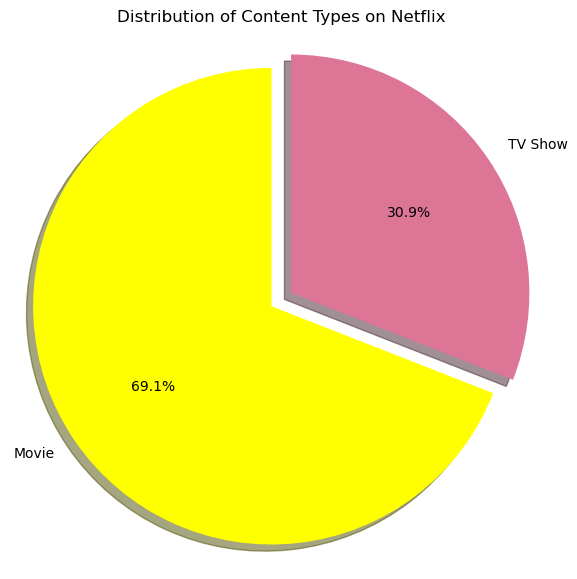

In [33]:
# Creating a pie chart of the 'type' column

plt.figure(figsize=(7,7))

plt.pie(data['type'].value_counts(), labels=data['type'].value_counts().index,colors=['yellow','#DD7596'],explode=(0, 0.1),shadow=True, autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Content Types on Netflix')
plt.axis('equal')
plt.show()

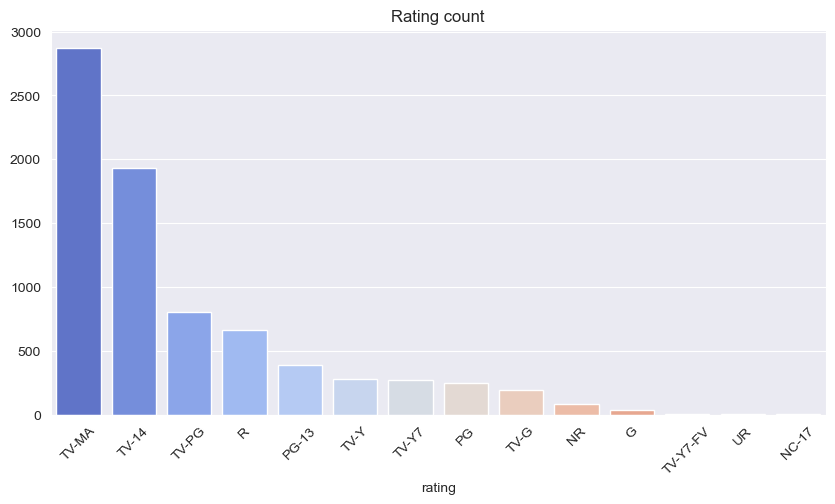

In [35]:
# Rating count

plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
rating_counts = data["rating"].value_counts().sort_values(ascending=False)
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette = "coolwarm", legend=False)
plt.title("Rating count")
plt.xticks(rotation=45)
plt.show()


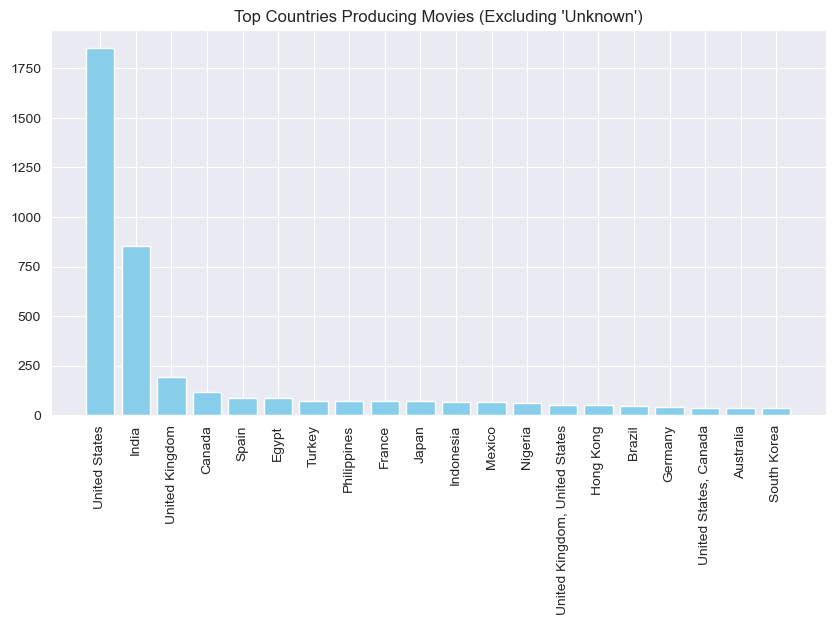

In [37]:
# Top Countries Producing Movies

plt.figure(figsize=(10,5))

movies = data[(data["type"] == "Movie") & (data["country"] != "Unknown")]

country_counts = movies["country"].value_counts().head(20)

plt.bar(country_counts.index, country_counts.values, color='skyblue')
plt.xticks(rotation=90)
plt.title("Top Countries Producing Movies (Excluding 'Unknown')")
plt.show()


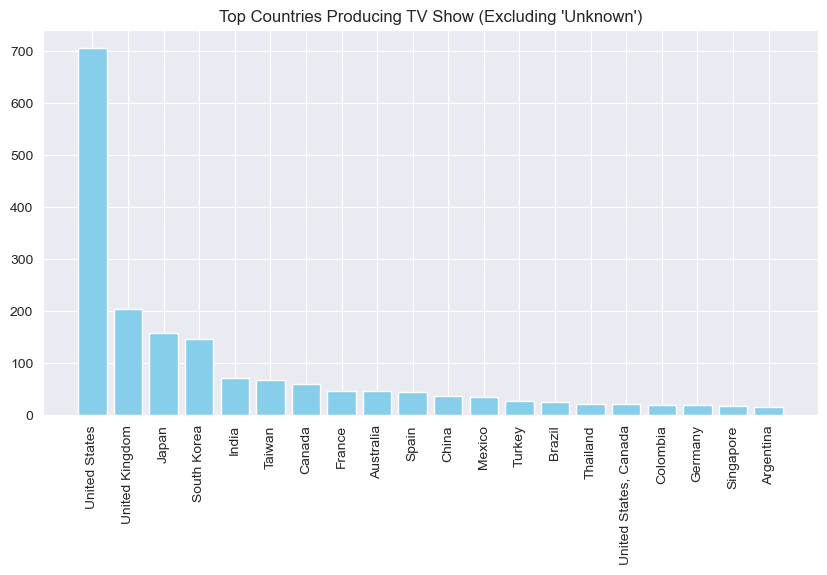

In [39]:
#Top Countries Producing TV Show

plt.figure(figsize=(10,5))

tv = data[(data["type"] == "TV Show") & (data["country"] != "Unknown")]

country_counts = tv["country"].value_counts().head(20)

plt.bar(country_counts.index, country_counts.values, color='skyblue')
plt.xticks(rotation=90)
plt.title("Top Countries Producing TV Show (Excluding 'Unknown')")
plt.show()

In [41]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [43]:
# creating date_added col for plots

data["date_added"] = pd.to_datetime(data["date_added"], errors="coerce")


In [45]:
data["added_month"] = data["date_added"].dt.month_name()


In [47]:
month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]


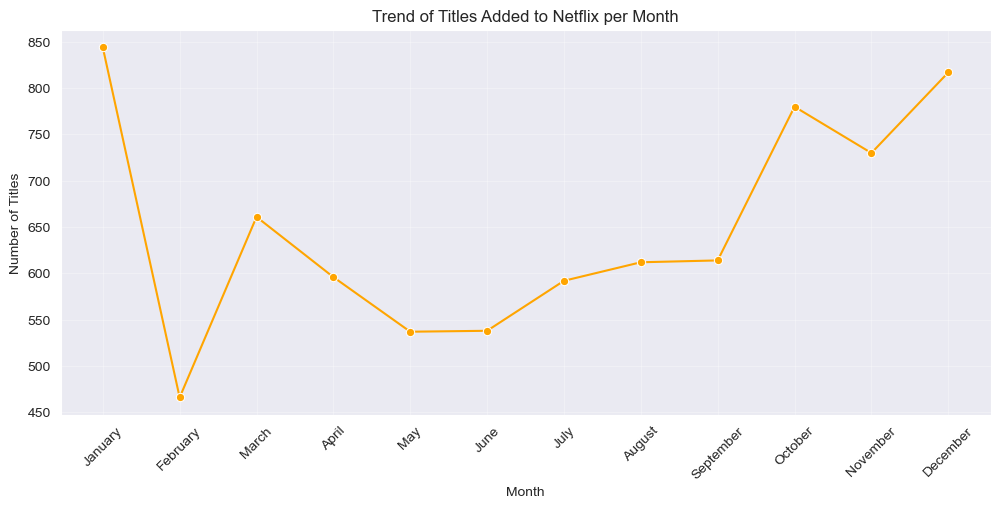

In [51]:
# Trend of Titles Added to Netflix per Month

month_counts = data["added_month"].value_counts().reindex(month_order)

plt.figure(figsize=(12,5))
sns.lineplot(x=month_counts.index, y=month_counts.values, color='orange', marker='o')
plt.title("Trend of Titles Added to Netflix per Month")
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()


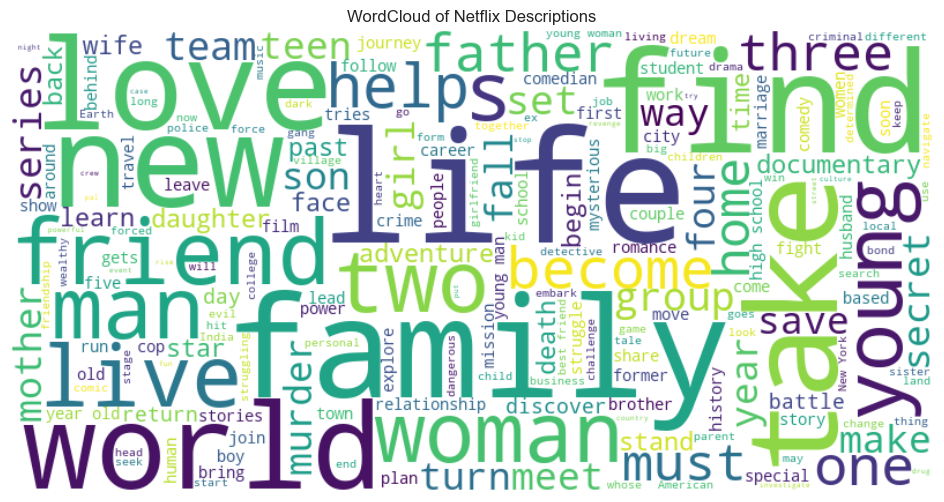

In [53]:
# Combine all descriptions into one text
text = " ".join(data["description"].dropna())
stopwords = set(STOPWORDS)
# Create WordCloud
wc = WordCloud(
    width=800,
    height=400,
    background_color="white",
    stopwords=stopwords,
    colormap="viridis"
).generate(text)

# Plot
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Netflix Descriptions")
plt.show()


# Data Preprocessing

In [55]:
data1 = data.copy()

In [206]:
data1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month
0,s1,TV Show,3%,Not Specified,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January


In [57]:
# Convert Duration to Numeric

data1["duration_num"] = data1["duration"].str.extract("(\d+)").astype(int)

In [59]:
# Encoding type

le = LabelEncoder()

data1["type"] = le.fit_transform(data1["type"])


In [61]:
# encoding rating

oh = OneHotEncoder(sparse_output=False)

onehot = oh.fit_transform(data1[["rating"]])

data_oh = pd.DataFrame(
    onehot,
    columns = oh.get_feature_names_out(["rating"])
)

data1 = pd.concat([data1.drop(columns= ["rating"]),data_oh], axis = 1)

In [63]:
data1.drop(['duration'], axis =1, inplace= True)

In [65]:
# TF-IDF for listed_in

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_genre = TfidfVectorizer(
    stop_words="english",      # remove common words
    ngram_range=(1, 2),        # unigrams + bigrams (optional)
    max_features=20          # limit dimension (tune if needed)
)

genre_tfidf = tfidf_genre.fit_transform(data1["listed_in"])
print(genre_tfidf.shape)       # (n_samples, n_genre_features)


(7787, 20)


In [67]:
# TF-IDF for description

tfidf_desc = TfidfVectorizer(
    stop_words="english",
    max_features=800        # more features here, descriptions are longer
)

desc_tfidf = tfidf_desc.fit_transform(data1["description"])
print(desc_tfidf.shape)        # (n_samples, n_desc_features)


(7787, 800)


In [69]:
genre_tfidf

<7787x20 sparse matrix of type '<class 'numpy.float64'>'
	with 30301 stored elements in Compressed Sparse Row format>

# feature engineering

In [72]:
import datetime

current_year = datetime.datetime.now().year

data1["content_age"] = current_year - data1["release_year"]


In [74]:
data1["genre_count"] = data1["listed_in"].apply(lambda x: len(x.split(",")))


In [227]:
data1.head()

,show_id,type,title,director,cast,country,date_added,release_year,listed_in,description,...,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR,content_age,genre_count
0,s1,1,3%,Not Specified,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,3
1,s2,0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,2
2,s3,0,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,2
3,s4,0,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16,3
4,s5,0,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,Dramas,A brilliant group of students become card-coun...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,1


In [76]:
data1.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'listed_in', 'description', 'added_month',
       'duration_num', 'rating_G', 'rating_NC-17', 'rating_NR', 'rating_PG',
       'rating_PG-13', 'rating_R', 'rating_TV-14', 'rating_TV-G',
       'rating_TV-MA', 'rating_TV-PG', 'rating_TV-Y', 'rating_TV-Y7',
       'rating_TV-Y7-FV', 'rating_UR', 'content_age', 'genre_count'],
      dtype='object')

In [78]:
# data merging

In [80]:
numeric_cols = ["type", "release_year", "duration_num", "genre_count","content_age"]

# std scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(data1[numeric_cols])


In [82]:
from scipy.sparse import hstack

X_final = hstack([desc_tfidf, genre_tfidf, numeric_scaled])
print(X_final.shape)


(7787, 825)


# Clustering Model Selection

## K means

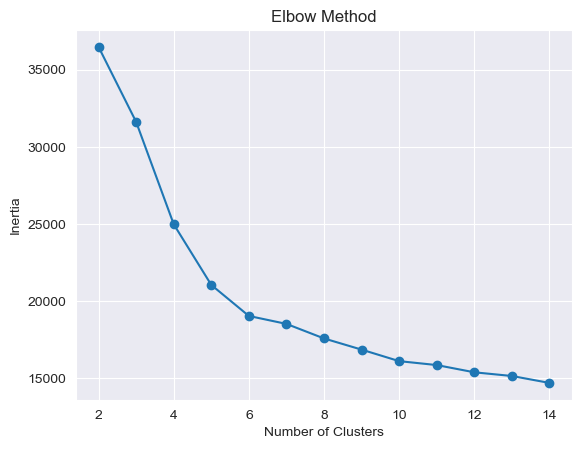

In [86]:
inertias = []
K = range(2, 15)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_final)
    inertias.append(km.inertia_)

plt.plot(K, inertias, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [88]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_final)


KMeans(n_clusters=4, random_state=42)

In [90]:
kmeans.predict(X_final)

array([2, 0, 0, ..., 0, 3, 0])

In [92]:
data1["cluster"] = kmeans.labels_

In [94]:
data1["cluster"].value_counts()

cluster
0    4928
3    1198
2    1185
1     476
Name: count, dtype: int64

In [96]:
# silhouette_score

score = silhouette_score(X_final, kmeans.labels_)
print("Silhouette Score:", score)


Silhouette Score: 0.2908803813612446


## hierarchy 

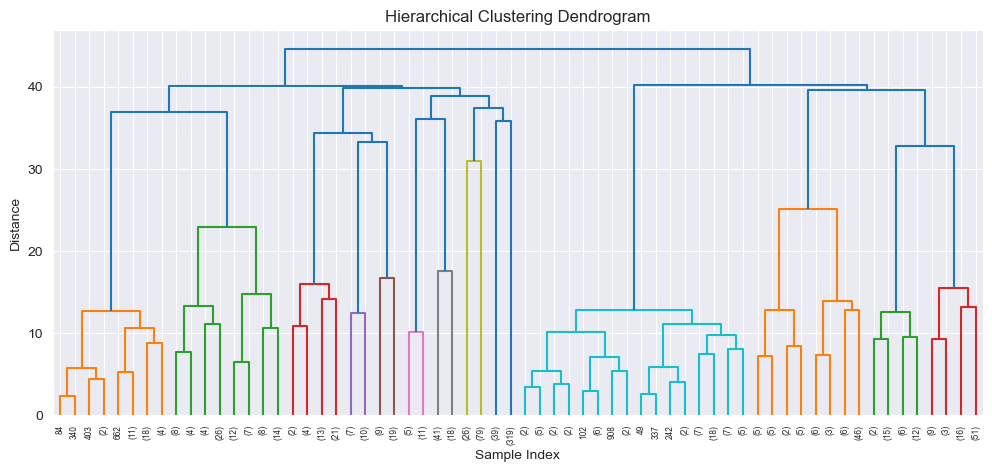

In [98]:
# Step 1: Reduce dimensionality (necessary for dendrogram)
svd = TruncatedSVD(n_components=30, random_state=42)
X_reduced = svd.fit_transform(X_final)

# Step 2: Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

# Step 3: Take a sample for dendrogram
sample_size = 1000
idx = np.random.choice(len(X_scaled), size=sample_size, replace=False)
X_sample = X_scaled[idx]

# Step 4: Compute linkage matrix
Z = linkage(X_sample, method="ward")

# Step 5: Plot dendrogram
plt.figure(figsize=(12, 5))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


## DBSCAN

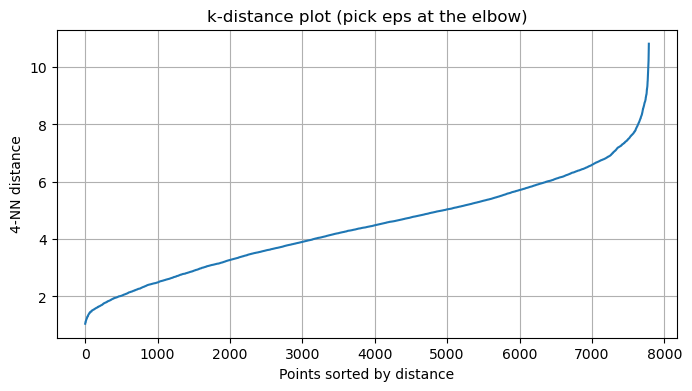

DBSCAN clusters: 12
Noise points: 7652 / 7787 (98.27%)
Cluster counts: Counter({-1: 7652, 4: 35, 0: 18, 2: 16, 9: 12, 8: 9, 1: 8, 3: 7, 11: 7, 10: 6, 5: 6, 6: 6, 7: 5})

Label -1 (n=8 shown): ['3%', '7:19', '23:59', '9', '21', '46', '122', '187']

Label 0 (n=8 shown): ['100 Days Of Solitude', 'Alias JJ, la celebridad del mal', 'Barbecue', "Don't Look Down", 'Enter the Anime', "Eve's Apple", 'Food on the Go', 'I Am Sun Mu']

Label 1 (n=8 shown): ['Aajcha Divas Majha', 'All of You', 'EMI: Liya Hai To Chukana Padega', 'Freej Al Taibeen', 'Kanavu Variyam', 'My Ex & Whys', 'Oh My God', 'Very Big Shot']

Label 2 (n=8 shown): ['Ask the StoryBots', 'Ben 10', 'Black Ink Crew New York', 'Cooking on High', 'Emogenius', 'For the Win', 'Highway Thru Hell', 'Kid-E-Cats']

Label 3 (n=7 shown): ['100 Humans', "Chef's Table", 'Coach Snoop', 'Glitter Force Doki Doki', "Inside Bill's Brain: Decoding Bill Gates", 'The Curse of Oak Island', 'Yu-Gi-Oh! Arc-V']

Label 4 (n=8 shown): ['27: Gone Too Soon', 'Ai

In [255]:
# DBSCAN workflow (SVD -> scale -> k-distance -> DBSCAN -> quick inspect)
# 1) Reduce dimensionality (sparse -> dense)
svd = TruncatedSVD(n_components=50, random_state=42)
X_svd = svd.fit_transform(X_final)             # shape (n_samples, 50)

# 2) Scale SVD components
X_scaled = StandardScaler().fit_transform(X_svd)

# 3) k-distance plot (use this to pick eps visually)
k = 4
nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)
distances, _ = nbrs.kneighbors(X_scaled)
k_dist = np.sort(distances[:, k-1])

plt.figure(figsize=(8,4))
plt.plot(k_dist)
plt.title("k-distance plot (pick eps at the elbow)")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{k}-NN distance")
plt.grid(True)
plt.show()

# 4) Run DBSCAN (replace eps_val with elbow value you chose)
eps_val = 1.5    # ← choose after viewing the k-distance plot
min_samples = 5

db = DBSCAN(eps=eps_val, min_samples=min_samples, metric='euclidean', n_jobs=-1)
labels = db.fit_predict(X_scaled)

# 5) Diagnostics + attach labels
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = int((labels == -1).sum())
print("DBSCAN clusters:", n_clusters)
print(f"Noise points: {n_noise} / {X_scaled.shape[0]} ({n_noise / X_scaled.shape[0]*100:.2f}%)")
print("Cluster counts:", Counter(labels))

data["dbscan_label"] = labels

# 6) Quick sample per label
for lab in sorted(set(labels)):
    sample = data.loc[data["dbscan_label"] == lab, "title"].head(8).tolist()
    print(f"\nLabel {lab} (n={len(sample)} shown):", sample)


# Model Training & Optimization

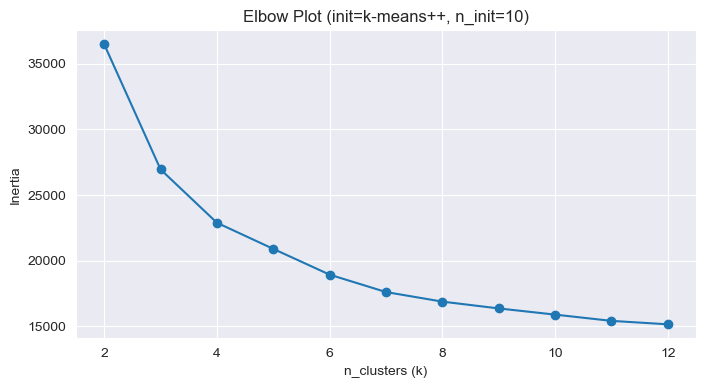

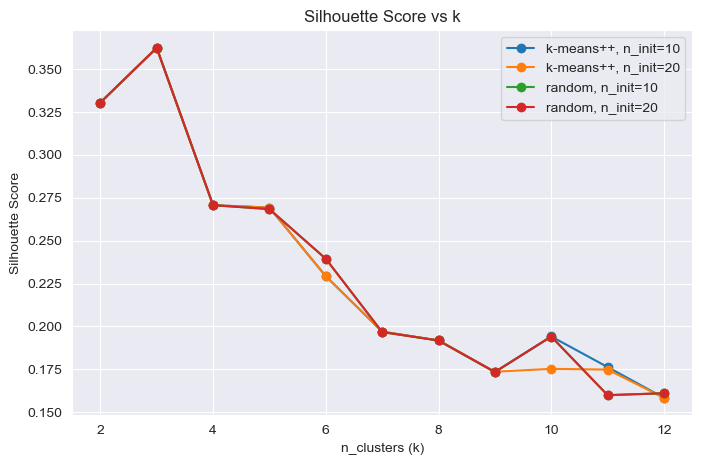

Best by silhouette:
 init                   k-means++
n_init                        10
k                              3
inertia              26944.79334
silhouette              0.362444
calinski_harabasz    3663.236893
davies_bouldin          1.062836
Name: 1, dtype: object

Best by inertia (lowest):
 init                       random
n_init                         10
k                              12
inertia              15130.120808
silhouette               0.161091
calinski_harabasz     1736.699176
davies_bouldin           1.798956
Name: 32, dtype: object

Auto-selected best config by silhouette: {'init': 'k-means++', 'n_init': 10, 'k': 3, 'inertia': 26944.793340017844, 'silhouette': 0.362443566390593, 'calinski_harabasz': 3663.236893289692, 'davies_bouldin': 1.0628356000037518}


In [100]:
# # fine-tune hyperparameters for kmeans
# Assumes:
#   X_final is prepared (sparse or dense). If sparse: convert to array for metrics that require dense.
#   If X_final is very large & sparse, consider using TruncatedSVD before KMeans tuning.

# -------- SETTINGS you can change ----------
use_mini_batch = False      # set True to use MiniBatchKMeans (faster)
k_range = range(2, 13)     # test K from 2..12 (tune as needed)
init_list = ['k-means++', 'random']
n_init_list = [10, 20]     # number of restarts to try
max_iter = 300
random_state = 42
# -------------------------------------------

# Convert X_final to dense if it's a sparse matrix and if you have enough RAM.
# For metrics silhouette/calinski/davies, a dense array is required.
try:
    X_array = X_final.toarray()  # for scipy sparse
except:
    X_array = np.asarray(X_final)

results = []
model_store = {}  # to save models if you want later

for init_method in init_list:
    for n_init in n_init_list:
        for k in k_range:
            # choose estimator
            if use_mini_batch:
                km = MiniBatchKMeans(n_clusters=k, init=init_method, n_init=n_init,
                                     max_iter=max_iter, random_state=random_state, batch_size=1024)
            else:
                km = KMeans(n_clusters=k, init=init_method, n_init=n_init,
                            max_iter=max_iter, random_state=random_state)
            # fit
            km.fit(X_final)    # if X_final is sparse, sklearn handles it for KMeans
            labels = km.labels_
            # compute metrics (only when at least 2 clusters found)
            inertia = km.inertia_
            sil = np.nan
            ch = np.nan
            db = np.nan
            if len(set(labels)) > 1:
                # Note: silhouette can be slow on large N; you can sample if needed
                try:
                    sil = silhouette_score(X_array, labels)
                    ch  = calinski_harabasz_score(X_array, labels)
                    db  = davies_bouldin_score(X_array, labels)
                except MemoryError:
                    sil = np.nan
                except Exception:
                    sil = np.nan

            results.append({
                'init': init_method,
                'n_init': n_init,
                'k': k,
                'inertia': inertia,
                'silhouette': sil,
                'calinski_harabasz': ch,
                'davies_bouldin': db
            })
            # optionally keep the model for best k
            model_store[(init_method, n_init, k)] = km

# Convert to DataFrame
res_df = pd.DataFrame(results)

# -- Plot Inertia (Elbow) for the default init/n_init (choose first combination) --
comb0 = (init_list[0], n_init_list[0])
subset = res_df[(res_df['init']==comb0[0]) & (res_df['n_init']==comb0[1])]
plt.figure(figsize=(8,4))
plt.plot(subset['k'], subset['inertia'], marker='o')
plt.title(f"Elbow Plot (init={comb0[0]}, n_init={comb0[1]})")
plt.xlabel("n_clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# -- Plot Silhouette vs k for each init/n_init combo --
plt.figure(figsize=(8,5))
for init_method in init_list:
    for n_init in n_init_list:
        sub = res_df[(res_df['init']==init_method) & (res_df['n_init']==n_init)]
        plt.plot(sub['k'], sub['silhouette'], marker='o', label=f"{init_method}, n_init={n_init}")
plt.title("Silhouette Score vs k")
plt.xlabel("n_clusters (k)")
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid(True)
plt.show()

# -- Show top few rows of best by silhouette & inertia --
best_by_sil = res_df.loc[res_df['silhouette'].idxmax()]
best_by_inertia = res_df.loc[res_df['inertia'].idxmin()]

print("Best by silhouette:\n", best_by_sil)
print("\nBest by inertia (lowest):\n", best_by_inertia)

# Auto-select best k by silhouette (if silhouette exists)
valid = res_df.dropna(subset=['silhouette'])
if not valid.empty:
    best_row = valid.loc[valid['silhouette'].idxmax()]
    print("\nAuto-selected best config by silhouette:", best_row.to_dict())
    best_model = model_store[(best_row['init'], int(best_row['n_init']), int(best_row['k']))]
    # attach labels back to dataframe
    data['kmeans_cluster'] = best_model.labels_
else:
    print("No valid silhouette scores computed. Use inertia/elbow to pick k.")


In [102]:
# best model

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
kmeans.fit(X_final)

data1["cluster"] = kmeans.labels_


In [104]:

for c in range(3):
    print(f"\nCluster {c}:")
    print(data1[data1.cluster==c].title.head(8).tolist())



Cluster 0:
['187', '28 Days', '300 Miles to Heaven', 'A Bridge Too Far', 'A Clockwork Orange', 'A Dangerous Woman', 'A Night at the Roxbury', 'A Stoning in Fulham County']

Cluster 1:
['7:19', '23:59', '9', '21', '122', '706', '1920', '1922']

Cluster 2:
['3%', '46', '1983', '1994', 'Feb-09', '\u200bSAINT SEIYA: Knights of the Zodiac', '(Un)Well', '#blackAF']


In [106]:
# scale for plot
svd = TruncatedSVD(n_components=30, random_state=42)
X_svd = svd.fit_transform(X_final)

pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_svd)


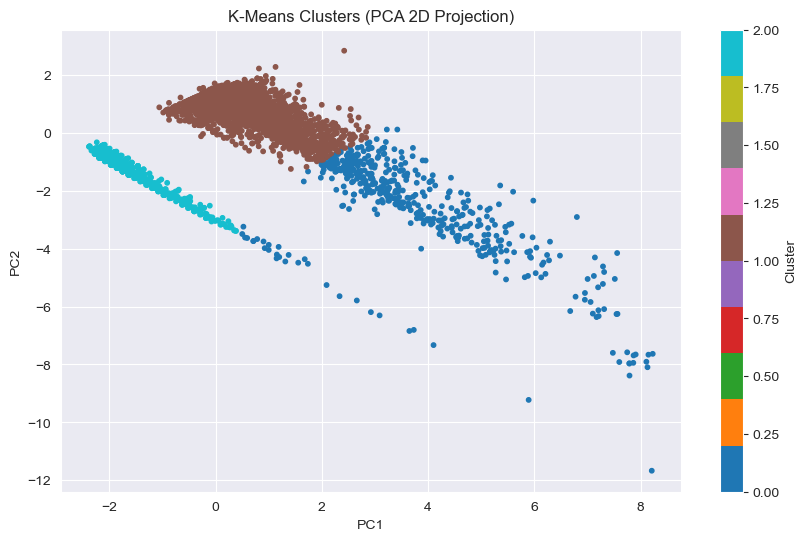

In [108]:

plt.figure(figsize=(10,6))
plt.scatter(
    X_2d[:, 0],
    X_2d[:, 1],
    c=kmeans.labels_,
    cmap='tab10',
    s=10
)

plt.title("K-Means Clusters (PCA 2D Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.show()


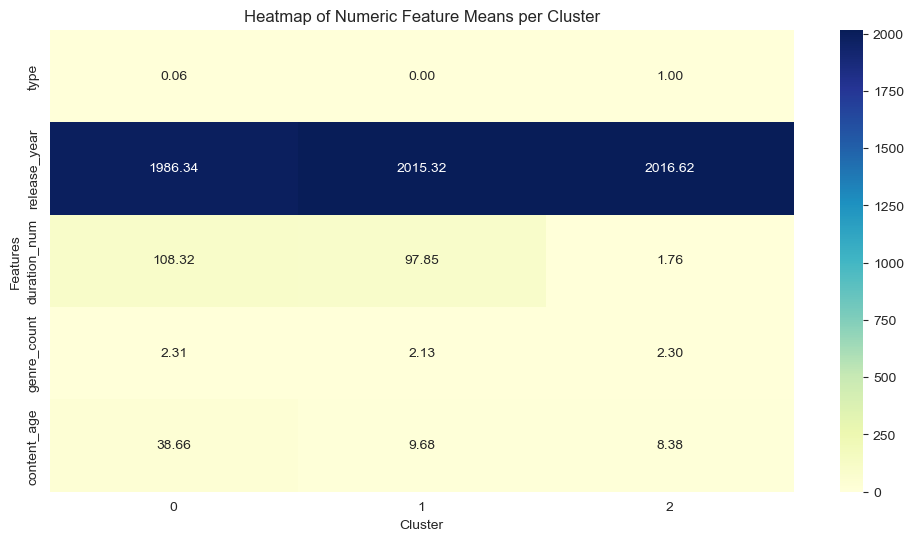

In [110]:
# heatmap

# final_data = your full feature matrix (must be a DataFrame, not sparse)
# If it's sparse, convert numeric features separately.

# 1. Copy numeric features only (TF-IDF cannot be averaged meaningfully here)
numeric_features = ["type", "release_year", "duration_num", "genre_count","content_age"]
# Add any other numeric features you kept

cluster_df = data1[numeric_features].copy()
cluster_df["cluster"] = data1["cluster"]   # cluster labels

# 2. Compute mean feature values per cluster
cluster_means = cluster_df.groupby("cluster").mean()

# 3. Create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means.T, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap of Numeric Feature Means per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Features")
plt.show()


Cluster summary saved to: /mnt/data/cluster_outputs\cluster_summary_table.csv
         n_items  avg_release_year  avg_duration_num  avg_genre_count  \
cluster                                                                 
0            479           1986.34            108.32             2.31   
1           4928           2015.32             97.85             2.13   
2           2380           2016.62              1.76             2.30   

         avg_content_age  
cluster                   
0                  38.66  
1                   9.68  
2                   8.38  
Saved: /mnt/data/cluster_outputs\genres_cluster_0.png


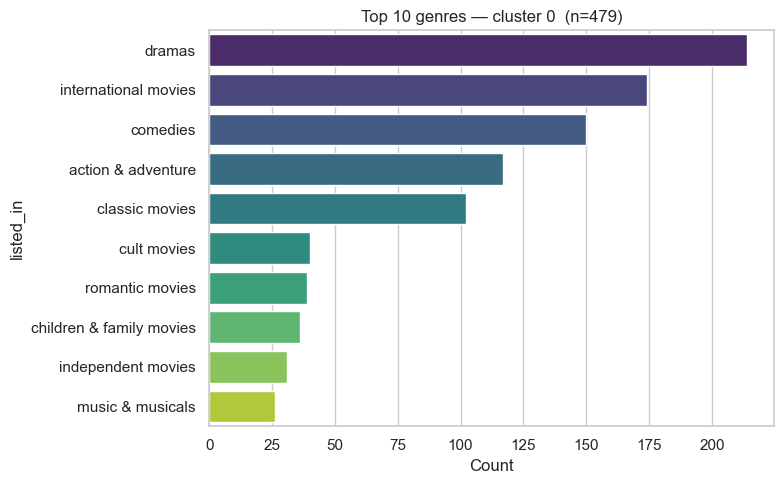

Saved: /mnt/data/cluster_outputs\genres_cluster_1.png


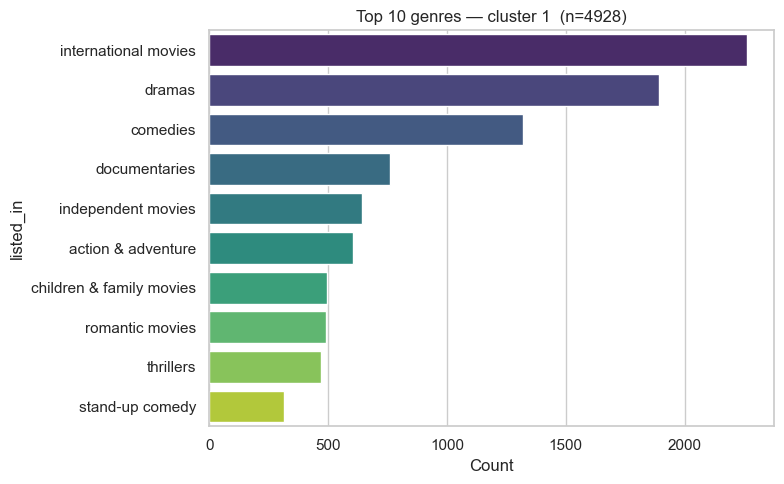

Saved: /mnt/data/cluster_outputs\genres_cluster_2.png


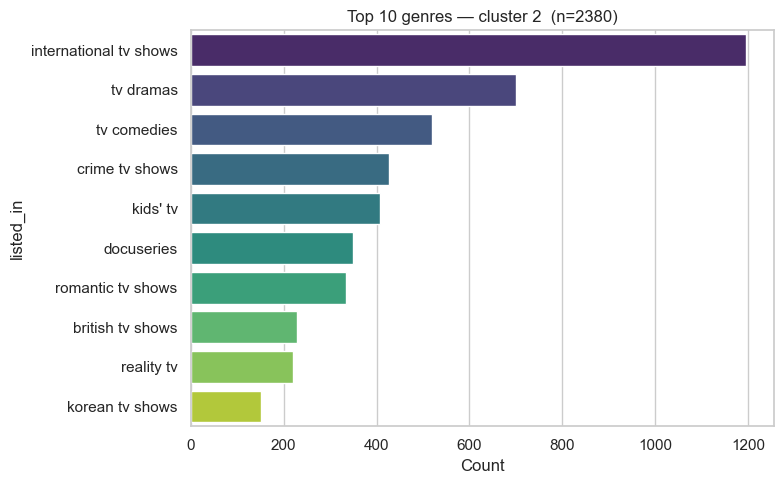

Column 'rating' not found — skipping rating plots.
Saved: /mnt/data/cluster_outputs\wordcloud_cluster_0.png


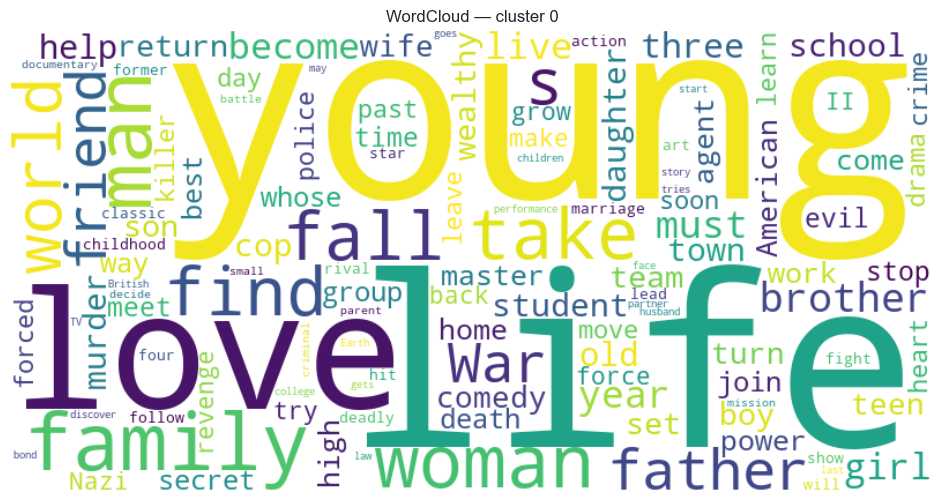

Saved: /mnt/data/cluster_outputs\wordcloud_cluster_1.png


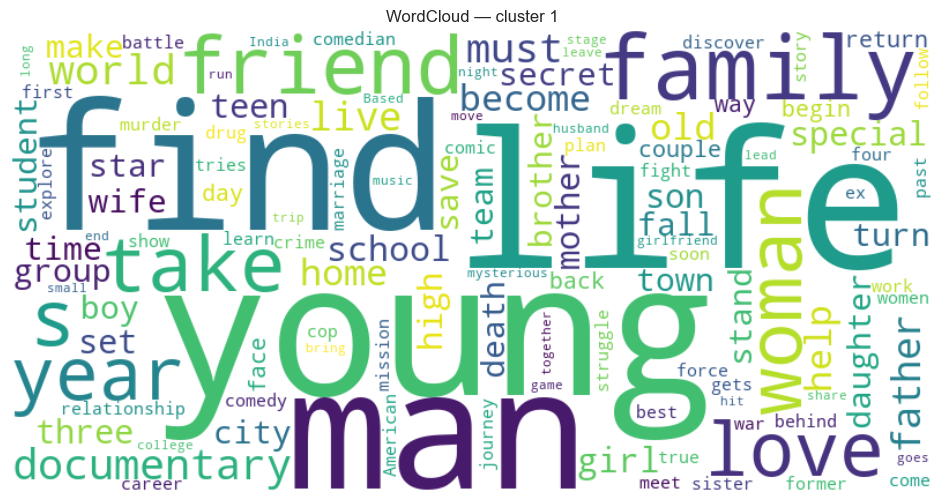

Saved: /mnt/data/cluster_outputs\wordcloud_cluster_2.png


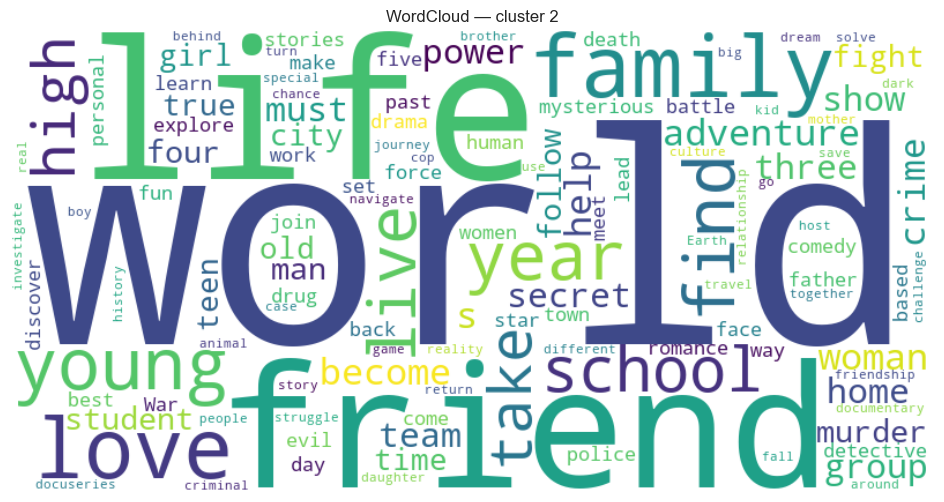


Clustering results summary:

 - Cluster 0: 479 items; avg release_year ≈ 1986; avg duration ≈ 108.3
 - Cluster 1: 4928 items; avg release_year ≈ 2015; avg duration ≈ 97.8
 - Cluster 2: 2380 items; avg release_year ≈ 2017; avg duration ≈ 1.8
Saved textual report to: /mnt/data/cluster_outputs\cluster_report.txt

All outputs saved into: /mnt/data/cluster_outputs


In [126]:
# === Cluster analysis visuals & summary (uses data1) ===


# config
df = data1                                 # your dataframe
cluster_col = "cluster"                    # label column
numeric_cols_for_summary = ["release_year", "duration_num", "genre_count", "content_age"]  # adjust if needed
output_dir = "/mnt/data/cluster_outputs"   # change if you want elsewhere
os.makedirs(output_dir, exist_ok=True)
sns.set(style="whitegrid")

# basic checks
if cluster_col not in df.columns:
    raise ValueError(f"Cluster column '{cluster_col}' not found in dataframe.")

# 1) Cluster summary table
summary = df.groupby(cluster_col).agg(
    n_items = ("title", "count"),
    avg_release_year = ("release_year", "mean"),
    avg_duration = ("duration_num", "mean"),
    avg_genre_count = ("genre_count", "mean"),
    avg_content_age = ("content_age", "mean")
).round(2)

# If some numeric cols missing, keep only available
existing = [c for c in numeric_cols_for_summary if c in df.columns]
if len(existing) == 0:
    print("No numeric columns found for summary other than title/cluster.")
else:
    # recompute only with existing columns for robust display
    summary = df.groupby(cluster_col)[["title"] + existing].agg({
        "title":"count",
        existing[0]:"mean"
    })
    # build nicer summary if multiple exist
    summary = df.groupby(cluster_col).agg(
        n_items=("title","count"),
        **{f"avg_{c}":(c,"mean") for c in existing}
    ).round(2)

summary = summary.sort_index()
summary.to_csv(os.path.join(output_dir, "cluster_summary_table.csv"))
print("Cluster summary saved to:", os.path.join(output_dir, "cluster_summary_table.csv"))
print(summary)

# 2) Genre distribution per cluster
# prepare genres: split 'listed_in' by comma, explode
if "listed_in" not in df.columns:
    print("Column 'listed_in' not found — skipping genre plots.")
else:
    genres = df[["title", "listed_in", cluster_col]].dropna(subset=["listed_in"]).copy()
    # split and explode
    genres["listed_in"] = genres["listed_in"].str.split(",")
    genres = genres.explode("listed_in")
    genres["listed_in"] = genres["listed_in"].str.strip().str.lower()

    # for each cluster plot top N genres
    topN = 10
    clusters = sorted(genres[cluster_col].unique())
    for c in clusters:
        counts = genres[genres[cluster_col]==c]["listed_in"].value_counts().nlargest(topN)
        plt.figure(figsize=(8,5))
        sns.barplot(x=counts.values, y=counts.index, palette="viridis")
        plt.title(f"Top {topN} genres — cluster {c}  (n={int((df[cluster_col]==c).sum())})")
        plt.xlabel("Count")
        plt.tight_layout()
        fname = os.path.join(output_dir, f"genres_cluster_{c}.png")
        plt.savefig(fname, dpi=150)
        print("Saved:", fname)
        plt.show()

# 3) Rating distribution per cluster
if "rating" not in df.columns:
    print("Column 'rating' not found — skipping rating plots.")
else:
    # clean rating
    rating_df = df[[cluster_col, "rating"]].copy()
    rating_df["rating"] = rating_df["rating"].fillna("Unknown").astype(str).str.strip()
    clusters = sorted(rating_df[cluster_col].unique())
    for c in clusters:
        rc = rating_df[rating_df[cluster_col]==c]["rating"].value_counts().nlargest(12)  # top 12 categories
        plt.figure(figsize=(8,5))
        sns.barplot(x=rc.values, y=rc.index, palette="magma")
        plt.title(f"Top ratings — cluster {c}  (n={int((df[cluster_col]==c).sum())})")
        plt.xlabel("Count")
        plt.tight_layout()
        fname = os.path.join(output_dir, f"ratings_cluster_{c}.png")
        plt.savefig(fname, dpi=150)
        print("Saved:", fname)
        plt.show()

# 4) WordCloud per cluster (from description)
if "description" not in df.columns:
    print("Column 'description' not found — skipping wordclouds.")
else:
    # build stopwords
    stopwords = set(STOPWORDS)
    # optional extend
    stopwords.update(["film","movie","series","season","series","one","two","also","new"]) 

    clusters = sorted(df[cluster_col].dropna().unique())
    for c in clusters:
        texts = df.loc[df[cluster_col]==c, "description"].dropna().astype(str)
        if texts.shape[0] == 0:
            print(f"No descriptions in cluster {c}, skipping wordcloud.")
            continue
        combined = " ".join(texts.tolist())
        if len(combined.strip()) == 0:
            print(f"Empty text for cluster {c}, skipping.")
            continue

        wc = WordCloud(
            width=800, height=400,
            background_color="white",
            stopwords=stopwords,
            max_words=120,
            collocations=False
        ).generate(combined)

        plt.figure(figsize=(12,6))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"WordCloud — cluster {c}")
        fname = os.path.join(output_dir, f"wordcloud_cluster_{c}.png")
        plt.savefig(fname, dpi=150, bbox_inches="tight")
        print("Saved:", fname)
        plt.show()

# 5) Polished cluster summary paragraph (for report)
# Build quick textual summary using the summary and top genres for each cluster if available
report_lines = []
report_lines.append("Clustering results summary:\n")
for c in summary.index:
    n = int(summary.loc[c, "n_items"]) if "n_items" in summary.columns else int(df[df[cluster_col]==c].shape[0])
    parts = [f"Cluster {c}: {n} items"]
    if "avg_release_year" in summary.columns or any(col.startswith("avg_release_year") for col in summary.columns):
        if "avg_release_year" in summary.columns:
            parts.append(f"avg release_year ≈ {summary.loc[c,'avg_release_year']:.0f}")
        else:
            # attempt to find any avg_release_year-like col
            for col in summary.columns:
                if "release" in col:
                    parts.append(f"{col} ≈ {summary.loc[c,col]:.0f}")
    if "avg_duration" in summary.columns or any("duration" in col for col in summary.columns):
        durcol = [col for col in summary.columns if "duration" in col]
        if durcol:
            parts.append(f"avg duration ≈ {summary.loc[c,durcol[0]]:.1f}")
    report_lines.append(" - " + "; ".join(parts))

report_text = "\n".join(report_lines)
print("\n" + report_text)

# Save the text report to file
with open(os.path.join(output_dir, "cluster_report.txt"), "w", encoding="utf-8") as f:
    f.write(report_text)
print("Saved textual report to:", os.path.join(output_dir, "cluster_report.txt"))

print("\nAll outputs saved into:", output_dir)


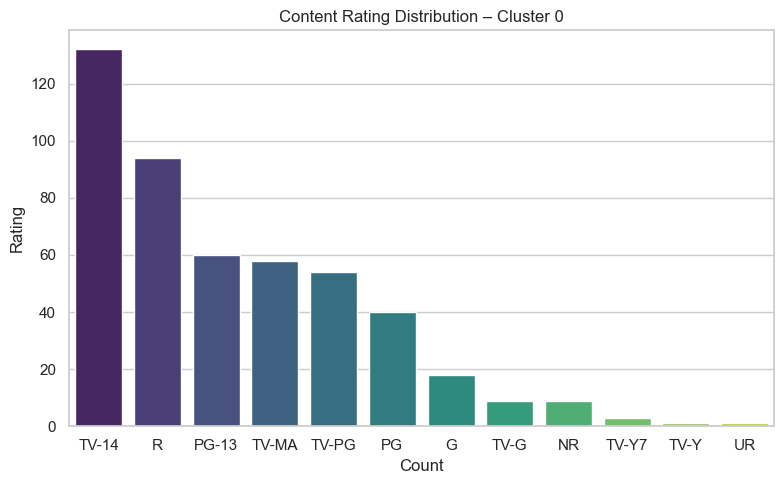

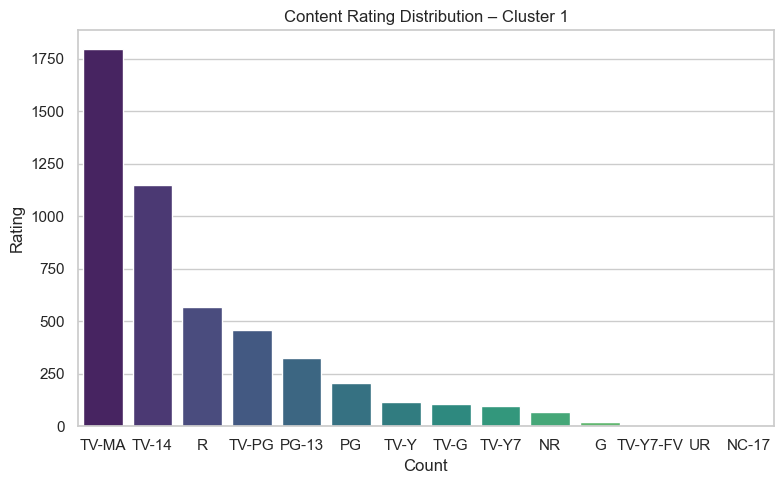

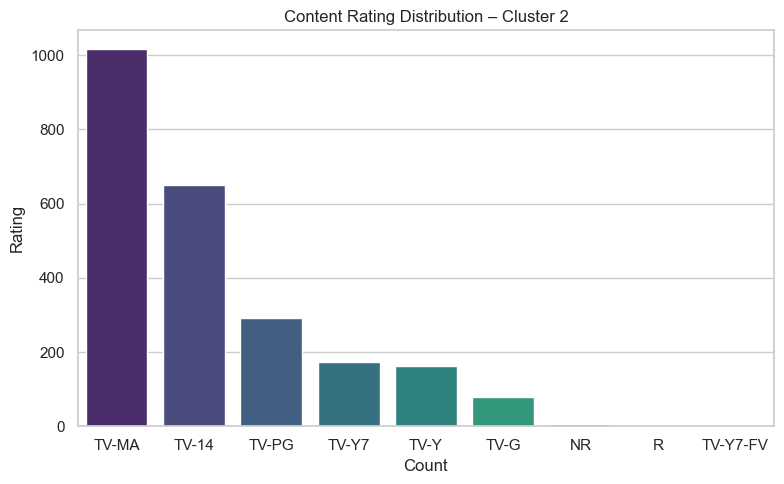

In [124]:
# Make sure missing ratings are handled
data["rating"] = data["rating"].fillna("Unknown")
# Copy cluster labels from data1 to data
data["cluster"] = data1["cluster"].values


clusters = sorted(data["cluster"].unique())

for c in clusters:
    plt.figure(figsize=(8, 5))
    
    rating_counts = (
        data[data["cluster"] == c]["rating"]
        .value_counts()
    )
    
    sns.barplot(
        y=rating_counts.values,
        x=rating_counts.index,
        palette="viridis"
    )
    
    plt.title(f"Content Rating Distribution – Cluster {c}")
    plt.xlabel("Count")
    plt.ylabel("Rating")
    plt.tight_layout()
    plt.show()


# Evaluation 

In [146]:
best_by_sil = res_df.loc[res_df['silhouette'].idxmax()]
best_by_inertia = res_df.loc[res_df['inertia'].idxmin()]

print("Best by silhouette:\n", best_by_sil)
print("\nBest by inertia (lowest):\n", best_by_inertia)

# Auto-select best k by silhouette (if silhouette exists)
valid = res_df.dropna(subset=['silhouette'])
if not valid.empty:
    best_row = valid.loc[valid['silhouette'].idxmax()]
    print("\nAuto-selected best config by silhouette:", best_row.to_dict())
    best_model = model_store[(best_row['init'], int(best_row['n_init']), int(best_row['k']))]
    # attach labels back to dataframe
    data['kmeans_cluster'] = best_model.labels_
else:
    print("No valid silhouette scores computed. Use inertia/elbow to pick k.")


Best by silhouette:
 init                   k-means++
n_init                        10
k                              3
inertia              26944.79334
silhouette              0.362444
calinski_harabasz    3663.236893
davies_bouldin          1.062836
Name: 1, dtype: object

Best by inertia (lowest):
 init                       random
n_init                         10
k                              12
inertia              15130.120808
silhouette               0.161091
calinski_harabasz     1736.699176
davies_bouldin           1.798956
Name: 32, dtype: object

Auto-selected best config by silhouette: {'init': 'k-means++', 'n_init': 10, 'k': 3, 'inertia': 26944.793340017844, 'silhouette': 0.362443566390593, 'calinski_harabasz': 3663.236893289692, 'davies_bouldin': 1.0628356000037518}
